A dataset collected in a cosmetics shop showing details of customers and whether or not they responded to a special offer to buy a new lip-stick is shown in table below. 
Use this dataset to build a **decision tree**, with Buys as the target variable, to help in buying lip-sticks in the future. 
Find the root node of decision tree. According to the decision tree you have made from previous training data set, what is the decision for the test data: **[Age < 21,Income = Low, Gender = Female, Marital Status = Married]**?

In [1]:
import numpy as np
import pandas as pd

In [2]:
# given dataset
dataset = [
['<21', 'High', 'Male', 'Single', 'No'],
['<21', 'High', 'Male', 'Married', 'No'],
['21-35', 'High', 'Male', 'Single', 'Yes'],
['>35', 'Medium', 'Male', 'Single', 'Yes'],
['>35', 'Low', 'Female', 'Single', 'Yes'],
['>35', 'Low', 'Female', 'Married', 'No'],
['21-35', 'Low', 'Female', 'Married', 'Yes'],
['<21', 'Medium', 'Male', 'Single', 'No'],
['<21', 'Low', 'Female', 'Married', 'Yes'],
['>35', 'Medium', 'Female', 'Single', 'Yes'],
['<21', 'Medium', 'Female', 'Married', 'Yes'],
['21-35', 'Medium', 'Male', 'Married', 'Yes'],
['21-35', 'High', 'Female', 'Single', 'Yes'],
['>35', 'Medium', 'Male', 'Married', 'No']
]

In [3]:
columns = ['Age', 'Income', 'Gender', 'Marital Status', 'Buys']
# prepare dataframe
df = pd.DataFrame(dataset, columns=columns)
df

,Age,Income,Gender,Marital Status,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [4]:
# Encode the categorical features
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

# encode all the columns
for i in range(len(columns)):
  df[columns[i]] = le.fit_transform(df[columns[i]])
df

,Age,Income,Gender,Marital Status,Buys
0,1,0,1,1,0
1,1,0,1,0,0
2,0,0,1,1,1
3,2,2,1,1,1
4,2,1,0,1,1
5,2,1,0,0,0
6,0,1,0,0,1
7,1,2,1,1,0
8,1,1,0,0,1
9,2,2,0,1,1


In [5]:
# set the test data
test_data = [[0, 0, 0, 0]]
test = pd.DataFrame(test_data, columns=['Age', 'Income', 'Gender', 'Marital Status'])
test

,Age,Income,Gender,Marital Status
0,0,0,0,0


In [6]:
# build the decision tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

sklearn_dtree = DecisionTreeClassifier(criterion='entropy')

In [7]:
# drop the 'Buys' column from dataframe
df1 = df.copy()
df1.drop('Buys', axis=1, inplace=True)
X = df1
# X contains all the columns except 'Buys'

In [8]:
sklearn_dtree.fit(X, df['Buys'])
sklearn_dtree.predict(test)

array([1])

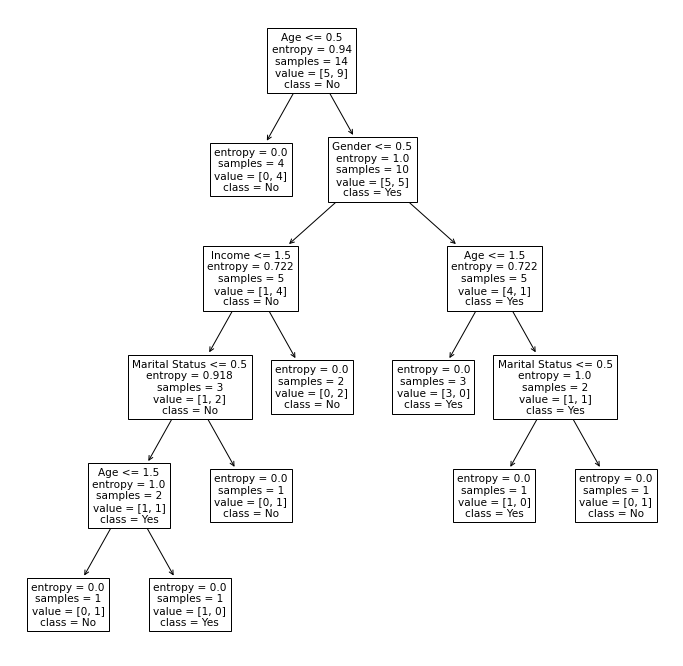

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
dec_tree = plot_tree(decision_tree=sklearn_dtree, feature_names=df.columns, class_names=['Yes', 'No'])
plt.show()